# Inequality (GINI) vs Unemployment Rate  

The GINI coefficient which measures **income inequality**. In the following, the relationship between the GINI coefficient  and the unemployment rate in the EU28 countries from **2008 to 2019** is analyzed. First a **linear**, then a **multivariable regression** are performed.

## 1. Import libraries and Data Sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 2. Linear Regression

In this part, the relationship between the GINI coefficient and the unemployment rate is analyzed **per mean** of the EU28 countries.

### 2.1 Data Wrangling

#### 2.1.1 Unemployment Rate

This chapter prepares the dataset for showing the unemployment rate of the EU28 **per year**.

In [2]:
# Load dataset 'unemployment'
unemp = (pd.read_pickle("../data/pickles/total_unemployment_rate.pkl")
           .reset_index())
unemp.head()

,index,AT,BE,BG,CH,CY,CZ,DE,DK,EA19,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2008,4.1,7.0,5.6,NaN,3.7,4.4,7.5,3.7,7.5,...,2.5,7.1,7.7,5.8,NaN,6.2,4.4,9.5,9.8,5.6
1,2009,5.3,7.9,6.8,NaN,5.4,6.7,7.8,6.4,9.6,...,3.1,8.2,9.6,6.9,NaN,8.4,5.9,12.0,12.6,7.6
2,2010,4.8,8.3,10.3,4.8,6.3,7.3,7.0,7.7,10.1,...,3.5,9.7,11.0,7.0,NaN,8.6,7.3,14.4,10.7,7.8
3,2011,4.6,7.2,11.3,4.4,7.9,6.7,5.8,7.8,10.2,...,3.2,9.7,12.9,7.2,NaN,7.8,8.2,13.6,8.8,8.1
4,2012,4.9,7.6,12.3,4.5,11.9,7.0,5.4,7.8,11.3,...,3.1,10.1,15.8,6.8,NaN,8.0,8.9,14.0,8.2,7.9


In [3]:
# Rename column
unemp2 = unemp.rename(columns = {'index': 'year'})
unemp2.head()

,year,AT,BE,BG,CH,CY,CZ,DE,DK,EA19,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2008,4.1,7.0,5.6,NaN,3.7,4.4,7.5,3.7,7.5,...,2.5,7.1,7.7,5.8,NaN,6.2,4.4,9.5,9.8,5.6
1,2009,5.3,7.9,6.8,NaN,5.4,6.7,7.8,6.4,9.6,...,3.1,8.2,9.6,6.9,NaN,8.4,5.9,12.0,12.6,7.6
2,2010,4.8,8.3,10.3,4.8,6.3,7.3,7.0,7.7,10.1,...,3.5,9.7,11.0,7.0,NaN,8.6,7.3,14.4,10.7,7.8
3,2011,4.6,7.2,11.3,4.4,7.9,6.7,5.8,7.8,10.2,...,3.2,9.7,12.9,7.2,NaN,7.8,8.2,13.6,8.8,8.1
4,2012,4.9,7.6,12.3,4.5,11.9,7.0,5.4,7.8,11.3,...,3.1,10.1,15.8,6.8,NaN,8.0,8.9,14.0,8.2,7.9


In [4]:
# See columns
unemp2.columns

Index(['year', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE',
       'EL', 'ES', 'EU27_2020', 'EU28', 'FI', 'FR', 'FX', 'HR', 'HU', 'IE',
       'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK'],
      dtype='object', name='')

In [5]:
# Select EU28 and rename column
unemp3 = unemp2[['year', 'EU28']]
unemp3 = unemp3.rename(columns = {'EU28': 'unemployment'})
unemp3.head()

,year,unemployment
0,2008,7.0
1,2009,8.9
2,2010,9.6
3,2011,9.6
4,2012,10.5


In [6]:
# Check datatype
unemp3.dtypes


year             object
unemployment    float64
dtype: object

In [7]:
# Turn year into numeric
unemp3['year'] = pd.to_numeric(unemp3['year'])
unemp3['year'].dtypes

dtype('int64')

In [8]:
# Subset unemployment from 2008 to 2012
unemp4 = unemp3.loc[unemp3['year'] <= 2019]
unemp4

,year,unemployment
0,2008,7.0
1,2009,8.9
2,2010,9.6
3,2011,9.6
4,2012,10.5
5,2013,10.8
6,2014,10.2
7,2015,9.4
8,2016,8.5
9,2017,7.6


#### 2.1.2 Gini Coefficient

This chapter prepares the dataset for showing the GINI coefficient of the EU28 **per year**.

In [9]:
# Load dataset 'gini coefficient'
gini = pd.read_csv("../data/pickles/ilc_di12.csv")
gini.head()

,Unnamed: 0,indic_il,geo,2019,2018,2017,2016,2015,2014,2013,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,0,GINI_HND,AT,27.5,26.8,27.9,27.2,27.2,27.6,27.0,...,25.8,27.4,NaN,24.0,24.0,26.0,24.0,25.0,26.0,27.0
1,1,GINI_HND,BE,NaN,25.7,26.1,26.3,26.2,25.9,25.9,...,26.1,28.3,NaN,28.0,30.0,29.0,27.0,27.0,28.0,29.0
2,2,GINI_HND,BG,40.8,39.6,40.2,37.7,37.0,35.4,35.4,...,NaN,NaN,26.0,26.0,25.0,NaN,NaN,NaN,NaN,NaN
3,3,GINI_HND,CH,NaN,29.7,30.1,29.4,29.6,29.5,28.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GINI_HND,CY,31.1,29.1,30.8,32.1,33.6,34.8,32.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN


In [10]:
# Drop unnecessary columns
# unemployment.transpose()
gini2 = gini.drop(columns=['Unnamed: 0'])
gini2.head()

,indic_il,geo,2019,2018,2017,2016,2015,2014,2013,2012,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,GINI_HND,AT,27.5,26.8,27.9,27.2,27.2,27.6,27.0,27.6,...,25.8,27.4,NaN,24.0,24.0,26.0,24.0,25.0,26.0,27.0
1,GINI_HND,BE,NaN,25.7,26.1,26.3,26.2,25.9,25.9,26.5,...,26.1,28.3,NaN,28.0,30.0,29.0,27.0,27.0,28.0,29.0
2,GINI_HND,BG,40.8,39.6,40.2,37.7,37.0,35.4,35.4,33.6,...,NaN,NaN,26.0,26.0,25.0,NaN,NaN,NaN,NaN,NaN
3,GINI_HND,CH,NaN,29.7,30.1,29.4,29.6,29.5,28.5,28.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GINI_HND,CY,31.1,29.1,30.8,32.1,33.6,34.8,32.4,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN


In [11]:
# Check first column
gini2['indic_il'].value_counts()

GINI_HND    45
Name: indic_il, dtype: int64

Since column 'indic_il' only contains the same values, it is dropped.

In [12]:
# Drop column
gini3 = gini2.drop(columns = 'indic_il')
gini3.head()

,geo,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,AT,27.5,26.8,27.9,27.2,27.2,27.6,27.0,27.6,27.4,...,25.8,27.4,NaN,24.0,24.0,26.0,24.0,25.0,26.0,27.0
1,BE,NaN,25.7,26.1,26.3,26.2,25.9,25.9,26.5,26.3,...,26.1,28.3,NaN,28.0,30.0,29.0,27.0,27.0,28.0,29.0
2,BG,40.8,39.6,40.2,37.7,37.0,35.4,35.4,33.6,35.0,...,NaN,NaN,26.0,26.0,25.0,NaN,NaN,NaN,NaN,NaN
3,CH,NaN,29.7,30.1,29.4,29.6,29.5,28.5,28.8,29.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CY,31.1,29.1,30.8,32.1,33.6,34.8,32.4,31.0,29.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN


In [13]:
# Select EU28 
gini4 = gini3.loc[gini3['geo'] == 'EU28']
gini4

,geo,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
19,EU28,NaN,30.8,30.6,30.8,31.0,31.0,30.5,30.5,30.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since column 'geo' only contains the same values, it is dropped.

In [14]:
# Drop column and transpose
gini5 = (gini4.drop(columns=['geo']).transpose()
                                    .reset_index()
                                    .rename(columns = {'index': 'year', 19: 'gini'}))
gini5

,year,gini
0,2019,NaN
1,2018,30.8
2,2017,30.6
3,2016,30.8
4,2015,31.0
5,2014,31.0
6,2013,30.5
7,2012,30.5
8,2011,30.8
9,2010,30.5


In [15]:
# Check datatype
gini5['year'].dtypes

dtype('O')

In [16]:
# Turn into numeric
gini5['year'] = pd.to_numeric(gini5['year'])
gini5

,year,gini
0,2019,NaN
1,2018,30.8
2,2017,30.6
3,2016,30.8
4,2015,31.0
5,2014,31.0
6,2013,30.5
7,2012,30.5
8,2011,30.8
9,2010,30.5


In [17]:
# Keep larger or equal 2010
gini6 = gini5.loc[gini5['year'] >= 2010]
gini6

,year,gini
0,2019,NaN
1,2018,30.8
2,2017,30.6
3,2016,30.8
4,2015,31.0
5,2014,31.0
6,2013,30.5
7,2012,30.5
8,2011,30.8
9,2010,30.5


Since 2019 contains **NaN**, the value is ignored.

In [18]:
#Ignore 2019
gini7 = gini6.loc[gini6['year'] != 2019]
gini7

,year,gini
1,2018,30.8
2,2017,30.6
3,2016,30.8
4,2015,31.0
5,2014,31.0
6,2013,30.5
7,2012,30.5
8,2011,30.8
9,2010,30.5


#### 2.1.3 Merge Unemployment Rate & GINI Coefficient

In [19]:
# Join gini7 with unemp4
gini_unemp_comb = pd.merge(gini7, unemp4, how = 'inner', on = 'year').sort_values('year')
gini_unemp_comb

,year,gini,unemployment
8,2010,30.5,9.6
7,2011,30.8,9.6
6,2012,30.5,10.5
5,2013,30.5,10.8
4,2014,31.0,10.2
3,2015,31.0,9.4
2,2016,30.8,8.5
1,2017,30.6,7.6
0,2018,30.8,6.8


### 2.2 Data Analysis

The **relationship** between the GINI coefficient and unemployment is modelled.

In [20]:
x = gini_unemp_comb['gini']
y = gini_unemp_comb['unemployment']
X = sm.add_constant(x)

In [21]:
# Ordinary Least Squares
model = sm.OLS(y, X).fit()

In [22]:
results = model.summary()
results

C:\Users\yuliz\anaconda3\envs\matrix\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unemployment   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.102
Method:                 Least Squares   F-statistic:                    0.2577
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.627
Time:                        10:40:43   Log-Likelihood:                -14.728
No. Observations:                   9   AIC:                             33.46
Df Residuals:                       7   BIC:                             33.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.1672     74.747      0.631      0.548    -129.582     223.916
gini          -1.2351      2.433     -0.508      0.627      -6.988       4.518
==============================================================================
Omnibus:                        1.601   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.066
Skew:                          -0.731   Prob(JB):                        0.587
Kurtosis:                       2.160   Cond. No.                     4.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The GINI coefficient and the unemployment rate have a **negative correlation** of -1.2351. This would mean that for every percentage point the gini coefficient goes up (the higher the income inequality), the unemployment rate goes down by -1.2351. However, R squared is 0.036 which means that **only 4% of the variance** of a dataset can be explained with the current model. Hence it can be fairly stated that the GINI coefficient and the unemployment rate have **no correlation**.

To visualize the relationship between the gini coefficient and the unemployment rate, a **scatterplot** and a **regression line** is plotted.

In [23]:
gini_unemp_comb['y_hat'] = model.predict(X)
gini_unemp_comb

,year,gini,unemployment,y_hat
8,2010,30.5,9.6,9.496689
7,2011,30.8,9.6,9.126159
6,2012,30.5,10.5,9.496689
5,2013,30.5,10.8,9.496689
4,2014,31.0,10.2,8.879139
3,2015,31.0,9.4,8.879139
2,2016,30.8,8.5,9.126159
1,2017,30.6,7.6,9.373179
0,2018,30.8,6.8,9.126159


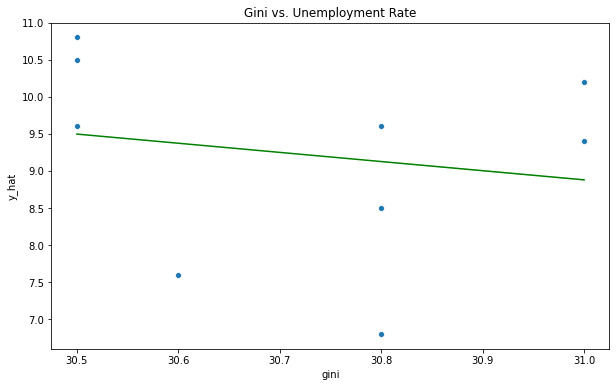

In [24]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(data = gini_unemp_comb,
                x = 'gini',
                y = 'unemployment',
                ax = ax);

sns.lineplot(data = gini_unemp_comb,
                x = 'gini',
                y = 'y_hat',
                color="green",
                ax = ax).set(title='Gini vs. Unemployment Rate');

The plot shows that the regression line has a **far distance** from scattered data points, which indicates no correlation. 

***

## 3. Multivariable Regression

In this part, the relationship between the GINI coefficient and the unemployment rate is analyzed by taking into account **pairs of values** between the gini coefficient and each of the EU28 countries.

### 3.1 Data Wrangling

#### 3.1.1 Unemployment Rate

In [25]:
# Call up the unemployment dataset with all countries
unemp2.head()

,year,AT,BE,BG,CH,CY,CZ,DE,DK,EA19,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2008,4.1,7.0,5.6,NaN,3.7,4.4,7.5,3.7,7.5,...,2.5,7.1,7.7,5.8,NaN,6.2,4.4,9.5,9.8,5.6
1,2009,5.3,7.9,6.8,NaN,5.4,6.7,7.8,6.4,9.6,...,3.1,8.2,9.6,6.9,NaN,8.4,5.9,12.0,12.6,7.6
2,2010,4.8,8.3,10.3,4.8,6.3,7.3,7.0,7.7,10.1,...,3.5,9.7,11.0,7.0,NaN,8.6,7.3,14.4,10.7,7.8
3,2011,4.6,7.2,11.3,4.4,7.9,6.7,5.8,7.8,10.2,...,3.2,9.7,12.9,7.2,NaN,7.8,8.2,13.6,8.8,8.1
4,2012,4.9,7.6,12.3,4.5,11.9,7.0,5.4,7.8,11.3,...,3.1,10.1,15.8,6.8,NaN,8.0,8.9,14.0,8.2,7.9


In [26]:
# See column names
unemp2.columns

Index(['year', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE',
       'EL', 'ES', 'EU27_2020', 'EU28', 'FI', 'FR', 'FX', 'HR', 'HU', 'IE',
       'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK'],
      dtype='object', name='')

In [27]:
# Ignore aggregate country names
unemp_new3 = unemp2[['year', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE',
       'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK']]
unemp_new3.head()

,year,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2008,4.1,7.0,5.6,NaN,3.7,4.4,7.5,3.7,5.5,...,2.5,7.1,7.7,5.8,NaN,6.2,4.4,9.5,9.8,5.6
1,2009,5.3,7.9,6.8,NaN,5.4,6.7,7.8,6.4,13.5,...,3.1,8.2,9.6,6.9,NaN,8.4,5.9,12.0,12.6,7.6
2,2010,4.8,8.3,10.3,4.8,6.3,7.3,7.0,7.7,16.7,...,3.5,9.7,11.0,7.0,NaN,8.6,7.3,14.4,10.7,7.8
3,2011,4.6,7.2,11.3,4.4,7.9,6.7,5.8,7.8,12.3,...,3.2,9.7,12.9,7.2,NaN,7.8,8.2,13.6,8.8,8.1
4,2012,4.9,7.6,12.3,4.5,11.9,7.0,5.4,7.8,10.0,...,3.1,10.1,15.8,6.8,NaN,8.0,8.9,14.0,8.2,7.9


In [28]:
# Ignore 2019 
unemp_new4 = unemp_new3.loc[unemp_new3['year'] != 2019]
unemp_new4.head()

,year,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2008,4.1,7.0,5.6,NaN,3.7,4.4,7.5,3.7,5.5,...,2.5,7.1,7.7,5.8,NaN,6.2,4.4,9.5,9.8,5.6
1,2009,5.3,7.9,6.8,NaN,5.4,6.7,7.8,6.4,13.5,...,3.1,8.2,9.6,6.9,NaN,8.4,5.9,12.0,12.6,7.6
2,2010,4.8,8.3,10.3,4.8,6.3,7.3,7.0,7.7,16.7,...,3.5,9.7,11.0,7.0,NaN,8.6,7.3,14.4,10.7,7.8
3,2011,4.6,7.2,11.3,4.4,7.9,6.7,5.8,7.8,12.3,...,3.2,9.7,12.9,7.2,NaN,7.8,8.2,13.6,8.8,8.1
4,2012,4.9,7.6,12.3,4.5,11.9,7.0,5.4,7.8,10.0,...,3.1,10.1,15.8,6.8,NaN,8.0,8.9,14.0,8.2,7.9


In [29]:
unemp_new4.columns

Index(['year', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL',
       'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR',
       'UK'],
      dtype='object', name='')

#### 3.1.2 GINI Coefficient

In [30]:
# Call up the gini dataset with all countries
gini3.head()

,geo,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,AT,27.5,26.8,27.9,27.2,27.2,27.6,27.0,27.6,27.4,...,25.8,27.4,NaN,24.0,24.0,26.0,24.0,25.0,26.0,27.0
1,BE,NaN,25.7,26.1,26.3,26.2,25.9,25.9,26.5,26.3,...,26.1,28.3,NaN,28.0,30.0,29.0,27.0,27.0,28.0,29.0
2,BG,40.8,39.6,40.2,37.7,37.0,35.4,35.4,33.6,35.0,...,NaN,NaN,26.0,26.0,25.0,NaN,NaN,NaN,NaN,NaN
3,CH,NaN,29.7,30.1,29.4,29.6,29.5,28.5,28.8,29.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CY,31.1,29.1,30.8,32.1,33.6,34.8,32.4,31.0,29.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN


In [31]:
gini_new4 = gini3.set_index('geo')
gini_new4.head()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
geo,,,,,,,,,,,,,,,,,,,,,
AT,27.5,26.8,27.9,27.2,27.2,27.6,27.0,27.6,27.4,28.3,...,25.8,27.4,NaN,24.0,24.0,26.0,24.0,25.0,26.0,27.0
BE,NaN,25.7,26.1,26.3,26.2,25.9,25.9,26.5,26.3,26.6,...,26.1,28.3,NaN,28.0,30.0,29.0,27.0,27.0,28.0,29.0
BG,40.8,39.6,40.2,37.7,37.0,35.4,35.4,33.6,35.0,33.2,...,NaN,NaN,26.0,26.0,25.0,NaN,NaN,NaN,NaN,NaN
CH,NaN,29.7,30.1,29.4,29.6,29.5,28.5,28.8,29.7,29.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,31.1,29.1,30.8,32.1,33.6,34.8,32.4,31.0,29.2,30.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN


In [32]:
# Transpose
gini_new5 = gini_new4.T.reset_index().rename(columns = {'index': 'year'})
gini_new5.head()

geo,year,AT,BE,BG,CH,CY,CZ,DE,DK,EA,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2019,27.5,NaN,40.8,NaN,31.1,24.0,NaN,27.5,NaN,...,NaN,28.5,31.9,34.8,NaN,27.6,23.9,NaN,NaN,NaN
1,2018,26.8,25.7,39.6,29.7,29.1,24.0,31.1,27.8,30.6,...,24.8,27.8,32.1,35.1,35.6,27.0,23.4,20.9,43.0,33.5
2,2017,27.9,26.1,40.2,30.1,30.8,24.5,29.1,27.6,30.4,...,26.1,29.2,33.5,33.1,37.8,28.0,23.7,23.2,43.0,33.1
3,2016,27.2,26.3,37.7,29.4,32.1,25.1,29.5,27.7,30.7,...,25.0,29.8,33.9,34.7,39.8,27.6,24.4,24.3,42.6,31.5
4,2015,27.2,26.2,37.0,29.6,33.6,25.0,30.1,27.4,30.7,...,23.9,30.6,34.0,37.4,40.0,26.7,24.5,23.7,41.9,32.4


In [33]:
# Check column names
gini_new5.columns

Index(['year', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA18',
       'EA19', 'EE', 'EL', 'ES', 'EU', 'EU15', 'EU25', 'EU27_2007',
       'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT',
       'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NMS10', 'NO', 'PL', 'PT', 'RO',
       'RS', 'SE', 'SI', 'SK', 'TR', 'UK'],
      dtype='object', name='geo')

In [34]:
# Ignore aggregate country names
gini_new6 = gini_new5[['year','AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL',  'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK']]
gini_new6.head()

geo,year,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2019,27.5,NaN,40.8,NaN,31.1,24.0,NaN,27.5,30.5,...,NaN,28.5,31.9,34.8,NaN,27.6,23.9,NaN,NaN,NaN
1,2018,26.8,25.7,39.6,29.7,29.1,24.0,31.1,27.8,30.6,...,24.8,27.8,32.1,35.1,35.6,27.0,23.4,20.9,43.0,33.5
2,2017,27.9,26.1,40.2,30.1,30.8,24.5,29.1,27.6,31.6,...,26.1,29.2,33.5,33.1,37.8,28.0,23.7,23.2,43.0,33.1
3,2016,27.2,26.3,37.7,29.4,32.1,25.1,29.5,27.7,32.7,...,25.0,29.8,33.9,34.7,39.8,27.6,24.4,24.3,42.6,31.5
4,2015,27.2,26.2,37.0,29.6,33.6,25.0,30.1,27.4,34.8,...,23.9,30.6,34.0,37.4,40.0,26.7,24.5,23.7,41.9,32.4


In [35]:
# Change column 'year' to numeric
gini_new6['year'] = pd.to_numeric(gini_new6['year'])
gini_new6['year']

<ipython-input-35-27322594dc1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gini_new6['year'] = pd.to_numeric(gini_new6['year'])


0     2019
1     2018
2     2017
3     2016
4     2015
5     2014
6     2013
7     2012
8     2011
9     2010
10    2009
11    2008
12    2007
13    2006
14    2005
15    2004
16    2003
17    2002
18    2001
19    2000
20    1999
21    1998
22    1997
23    1996
24    1995
Name: year, dtype: int64

In [36]:
# Ignore values below 2008
gini_new7 = gini_new6.loc[gini_new6['year'] >= 2008]
gini_new7.head()

geo,year,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2019,27.5,NaN,40.8,NaN,31.1,24.0,NaN,27.5,30.5,...,NaN,28.5,31.9,34.8,NaN,27.6,23.9,NaN,NaN,NaN
1,2018,26.8,25.7,39.6,29.7,29.1,24.0,31.1,27.8,30.6,...,24.8,27.8,32.1,35.1,35.6,27.0,23.4,20.9,43.0,33.5
2,2017,27.9,26.1,40.2,30.1,30.8,24.5,29.1,27.6,31.6,...,26.1,29.2,33.5,33.1,37.8,28.0,23.7,23.2,43.0,33.1
3,2016,27.2,26.3,37.7,29.4,32.1,25.1,29.5,27.7,32.7,...,25.0,29.8,33.9,34.7,39.8,27.6,24.4,24.3,42.6,31.5
4,2015,27.2,26.2,37.0,29.6,33.6,25.0,30.1,27.4,34.8,...,23.9,30.6,34.0,37.4,40.0,26.7,24.5,23.7,41.9,32.4


In [37]:
# Ignore 2019 
gini_new8 = gini_new7.loc[gini_new6['year'] != 2019]
gini_new8.head()

geo,year,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
1,2018,26.8,25.7,39.6,29.7,29.1,24.0,31.1,27.8,30.6,...,24.8,27.8,32.1,35.1,35.6,27.0,23.4,20.9,43.0,33.5
2,2017,27.9,26.1,40.2,30.1,30.8,24.5,29.1,27.6,31.6,...,26.1,29.2,33.5,33.1,37.8,28.0,23.7,23.2,43.0,33.1
3,2016,27.2,26.3,37.7,29.4,32.1,25.1,29.5,27.7,32.7,...,25.0,29.8,33.9,34.7,39.8,27.6,24.4,24.3,42.6,31.5
4,2015,27.2,26.2,37.0,29.6,33.6,25.0,30.1,27.4,34.8,...,23.9,30.6,34.0,37.4,40.0,26.7,24.5,23.7,41.9,32.4
5,2014,27.6,25.9,35.4,29.5,34.8,25.1,30.7,27.7,35.6,...,23.5,30.8,34.5,35.0,38.3,26.9,25.0,26.1,41.2,31.6


### 3.2 Data Analysis

In [38]:
x2 = gini_new5[['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL',  'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK']]
y2 = unemp_new4[['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK']]
X2 = sm.add_constant(x)

In [39]:
# Ordinary Least Squares
model2 = sm.OLS(y, X).fit()

In [40]:
results = model2.summary()
results

C:\Users\yuliz\anaconda3\envs\matrix\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unemployment   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.102
Method:                 Least Squares   F-statistic:                    0.2577
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.627
Time:                        10:40:43   Log-Likelihood:                -14.728
No. Observations:                   9   AIC:                             33.46
Df Residuals:                       7   BIC:                             33.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.1672     74.747      0.631      0.548    -129.582     223.916
gini          -1.2351      2.433     -0.508      0.627      -6.988       4.518
==============================================================================
Omnibus:                        1.601   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.066
Skew:                          -0.731   Prob(JB):                        0.587
Kurtosis:                       2.160   Cond. No.                     4.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion**: Whether the mean of the GINI coefficient and the unemployment rate of the EU28 is taken, or each country is treated individually, makes no difference in the correlation coefficient and R squared in the OLS at hand. As above the analysis reveals that there is **no correlation** between the GINI coefficient and the unemployment rate. Since in multivariable regressions R squared adjusted rather than Rsquared is considered, this finding is confirmed by a **negative value**. 